In [1]:
from google.colab.patches import cv2_imshow
from google.colab import drive
import numpy as np
import cv2
import matplotlib.pyplot as plt

drive.mount('/content/gdrive')

Mounted at /content/gdrive


(256, 256, 3)


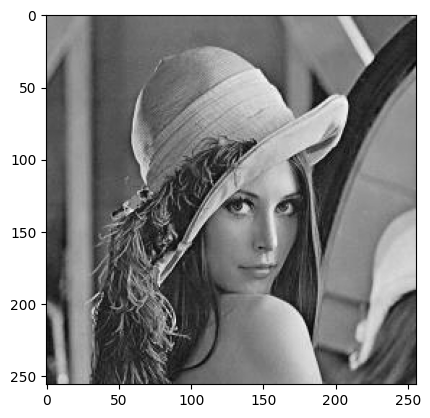

In [12]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/lena256.jpg')
print(img.shape)
gimg=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gimg, cmap='gray')
#cv2_imshow(gimg1)

#로버츠 검출기

In [13]:
gx = np.array(([-1, 0], [0, 1]), dtype=int)
gy = np.array(([0, -1], [1, 0]), dtype=int)

In [40]:
gx = np.array(([-1, 0, 0], [0, 1, 0], [0, 0, 0]), dtype=int)
gy = np.array(([0, 0, -1], [0, 1, 0], [0, 0, 0]), dtype=int)

#소벨 검출기

In [41]:
gx = np.array(([-1, 0, 0], [-2, 0, 2], [-1, 0, 1]), dtype=int)
gy = np.array(([1, 1, 1], [0, 0, 0], [-1, -2, -1]), dtype=int)

#프리윗 검출기

In [42]:
gx = np.array(([-1, 0, 0], [-1, 0, 1], [-1, 0, 1]), dtype=int)
gy = np.array(([1, 1, 1], [0, 0, 0], [-1, -1, -1]), dtype=int)

#엣지 검출기

In [43]:
x = cv2.filter2D(gimg, -1, gx)
y = cv2.filter2D(gimg, -1, gy)

In [44]:
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)

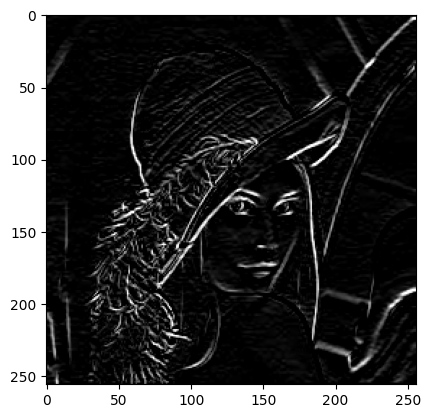

In [45]:
outImg = cv2.addWeighted(absX, 1, absY, 1, 0)

plt.imshow(outImg, cmap='gray')


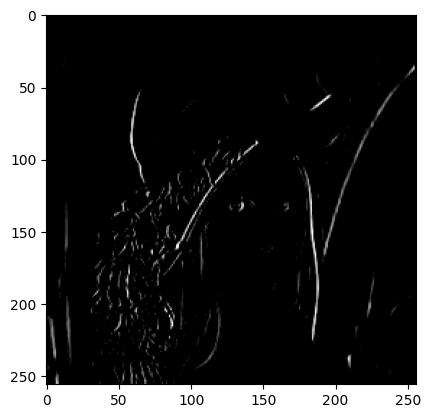

In [46]:
plt.imshow(absX, cmap='gray')

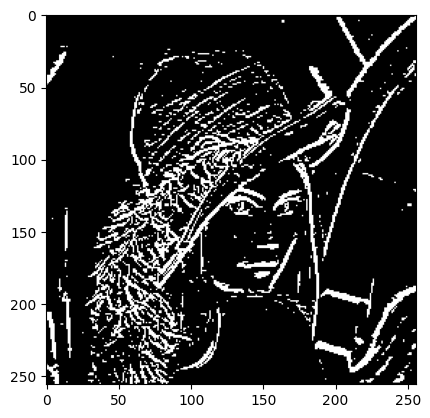

In [47]:
gBin = np.zeros(gimg.shape, dtype=int)

threshold = 30

for i in range(gimg.shape[0]):
    for j in range(gimg.shape[1]):
        if outImg[i, j] > threshold:
            gBin[i, j] = 255

    plt.imshow(gBin, cmap='gray')

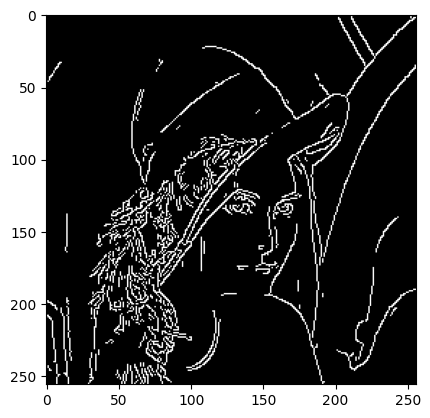

In [51]:
outimg = cv2.Canny(gimg, 200, 250)
plt.imshow(outimg, cmap='gray')